# 最急降下法で最小二乗法のパラメータを求めることは可能？

このページは以下のリンクより， google colaboratoryから動作させることができる．
- [Open with Colab](https://colab.research.google.com/github/crotsu/Bousai_AI/blob/master/chap2_Python/chap2_5_LSM_by_GDM.ipynb)

データを生成する．  
下記の式に，ノイズとして正規乱数（平均0．0，標準偏差0.5）が付加されてデータが生成されていると仮定する．

$$
 f(x)=0.7x+1.2
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 目的関数
def mathfunc(x):
    y = 0.7*x+1.2
    return y

# 定義域（xの範囲: -1.0から4.0）
# 生成するデータの個数は20個
xmin = -1.0
xmax = 4.0
num = 20

# 乱数の種を設定
np.random.seed(5)

# ランダムにxを生成
dataX = (xmax - xmin) * np.random.rand(num) + xmin
dataX = np.sort(dataX)


# ｘからｙを生成する．
dataY = mathfunc(dataX)

# yにノイズ（正規乱数（平均0．0， 標準偏差0.5））を加える．
dataY += np.random.normal(loc=0.0, scale=0.5, size=num)

# グラフ表示
plt.scatter(dataX, dataY)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

<Figure size 640x480 with 1 Axes>

最小二乗法の目的関数を作成する．

求めたい多項式  

$$
\begin{align}
f(x) &= a x + b
\end{align}
$$

損失関数  
$$
J(a,b) = \frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha - f(x_\alpha)\right)^2
$$

目的関数のグラフを描いてみよう．
まず，目的関数を展開する．
$$
\begin{align}
J(a,b) &= \frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha - f(x_\alpha)\right)^2\\
&=\frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha - (ax_\alpha+b)\right)^2\\
&=\frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha^2 - 2y_\alpha(ax_\alpha+b)+(ax_\alpha+b)^2\right)\\
&=\frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha^2 - 2ax_\alpha y_\alpha-2by_\alpha + a^2x_\alpha^2+2abx_\alpha+b^2\right)\\
&=\frac{1}{2}\left\{\sum_{\alpha=1}^N y^2-2a\sum_{\alpha=1}^N x_\alpha y_\alpha -2b \sum_{\alpha=1}^N y_\alpha + a^2 \sum_{\alpha=1}^N x_\alpha ^2 + 2ab \sum_{\alpha=1}^N x_\alpha + b^2 \sum_{\alpha=1}^N 1\right\}\\
\end{align}
$$

In [3]:
# データからΣのところを求める．

print(sum(dataY**2))
print(sum(dataX*dataY)*2)
print(sum(dataY)*2)
print(sum(dataX**2))
print(sum(dataX)*2)
print(len(dataX))

116.98497662087675
174.1579670342813
86.13927091200372
71.64662401762588
55.788229864823506
20


よって，損失関数は，
$$
J(a,b) = \frac{1.0}{2.0}\left(115.32-171.78a-86.14b+71.65a^2+55.79ab+20b^2\right)
$$

gnuplotでは以下のように入力する. 
```
splot[-10:10][-10:10] (1.0/2.0)*(115.32-171.78*x-86.14*y+71.65*x**2+55.79*x*y+20*y**2)
```

これをグラフに表示すると，以下のようになる．
![title](./img/obj1.gif)
![title](./img/obj2.gif)

損失関数は確かに下に凸のグラフで，最小値をとるa,bを求めることができそうである．

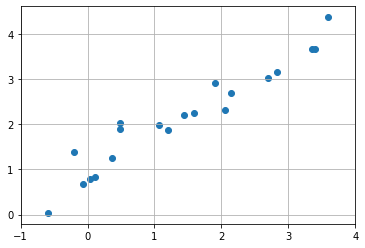

In [4]:
# グラフ表示
plt.scatter(dataX, dataY) # 散布図
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

[0.82490589 1.00298079]


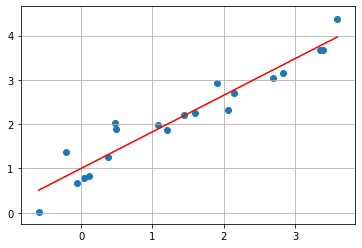

In [8]:
# ライブラリを使って最小二乗法を行う．
dim = 1
ans = np.polyfit(dataX, dataY, dim)
print(ans)

plt.plot(dataX, np.poly1d(ans)(dataX),color='red')
plt.scatter(dataX, dataY)
plt.grid(True)

最急降下法を用いて，最小二乗法を行うために式を導出する．

損失関数

$$
\begin{align}
J(a,b) &= \frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha - f(x_\alpha)\right)^2\\
&=\frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha - (ax_\alpha+b)\right)^2\\
&=\frac{1}{2}\sum_{\alpha=1}^N \left(y_\alpha - ax_\alpha-b\right)^2
\end{align}
$$

損失関数の偏微分
$$
\frac{\partial J(a, b)}{\partial a}=\sum_{\alpha=1}^N \left(y_\alpha - ax_\alpha -b \right) (-x)\\
\frac{\partial J(a, b)}{\partial a}=\sum_{\alpha=1}^N \left(y_\alpha - ax_\alpha -b \right) (1)\\
$$

最急降下法
$$
a_t = a_{t-1} - \eta \frac{\partial J(a, b)}{\partial a}\\
b_t = b_{t-1} - \eta \frac{\partial J(a, b)}{\partial b}
$$

ct=  0,  error=534.02,  a=  0.92,  b=  8.17
ct=  1,  error=189.73,  a= -1.15,  b=  7.29
ct=  2,  error=148.61,  a= -1.49,  b=  6.68
ct=  3,  error=124.79,  a= -1.41,  b=  6.17
ct=  4,  error=104.51,  a= -1.25,  b=  5.71
ct=  5,  error= 87.35,  a= -1.08,  b=  5.30
ct=  6,  error= 72.97,  a= -0.91,  b=  4.93
ct=  7,  error= 60.98,  a= -0.76,  b=  4.59
ct=  8,  error= 50.98,  a= -0.62,  b=  4.27
ct=  9,  error= 42.65,  a= -0.50,  b=  3.99
ct= 10,  error= 35.70,  a= -0.38,  b=  3.73
ct= 11,  error= 29.91,  a= -0.28,  b=  3.49
ct= 12,  error= 25.09,  a= -0.18,  b=  3.27
ct= 13,  error= 21.07,  a= -0.09,  b=  3.08
ct= 14,  error= 17.72,  a= -0.01,  b=  2.90
ct= 15,  error= 14.93,  a=  0.06,  b=  2.73
ct= 16,  error= 12.60,  a=  0.13,  b=  2.58
ct= 17,  error= 10.67,  a=  0.19,  b=  2.44
ct= 18,  error=  9.05,  a=  0.24,  b=  2.32
ct= 19,  error=  7.71,  a=  0.29,  b=  2.20
ct= 20,  error=  6.58,  a=  0.34,  b=  2.10
ct= 21,  error=  5.65,  a=  0.38,  b=  2.00
ct= 22,  error=  4.87,  a=  0.42

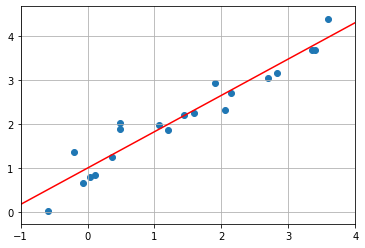

In [33]:
# 最急降下法を用いて，最小二乗法を行う

# 求める関数
def object_func(a, b, x):
    y  = a*x + b
    return y
    
# 損失関数
def error_func(a, b, x, y):
    error = 1.0/2.0 * sum((y-object_func(a, b, x))**2)
    return error

# 損失関数の偏微分:a
def ｄerivative_a(a, b):
    z =  sum((dataY-a*dataX-b)*(-dataX))
    return z

# 損失関数の偏微分:b
def derivative_b(a, b):
    z =  sum((dataY-a*dataX-b)*(-1))
    return z

# 最急降下法で損失関数の最小値をとるパラメータを求める．
eta = 0.01
a = 10
b =10

# 終了条件
epsilon = 0.0001
old_para_a = a
old_para_b = b

history = np.zeros((0,4))

ct = 0
for i in range(1000):
    # 更新式
    a = a - eta*derivative_a(a, b)
    b = b - eta*derivative_b(a, b)
    error = error_func(a, b, dataX, dataY)
    
    #print('ct={:d}'.format(ct),', error={:.2f}'.format(error),', a={:.2f}'.format(a), ', b={:.2f}'.format(b))
    print( "ct=%3d,  error=%6.2f,  a=%6.2f,  b=%6.2f" % (ct, error, a, b))
    
    history = np.vstack((history, [ct, error, a, b]))
    
    if abs(old_para_a-a)<epsilon and abs(old_para_b-b)<epsilon :
        break

    old_para_a = a
    old_para_b = b

    ct+=1

# 更新回数
print('更新回数=', ct)

# 求めたパラメータ
print('a=', a)
print('b=', b)


#
# 最急降下法で求めたパラメータを使って，グラフ表示
#
def mathfunc(x):
    y = a*x+b
    return y

# グラフ描画のためのデータ作成
xmin = -1.0
xmax = 4.0
num = 100
x = np.linspace(xmin, xmax, num)
y = mathfunc(x)

# グラフ描画
plt.plot(x, y, color='red')
plt.scatter(dataX, dataY)
plt.xlim(xmin, xmax)
plt.grid(True)
plt.show()

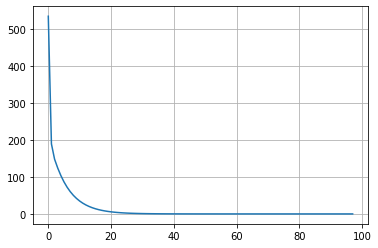

In [26]:
# 学習曲線の表示
plt.plot(history[:,0], history[:,1])
plt.grid()
plt.show()

せっかくなのでアニメーションで動作を見てみる！